# Shape of the Eiger v2 module from NanoMAX Eiger1M SAT

In [1]:
import sys
sys.path.insert(0,'./..')
sys.path.insert(0,'./../lib')

In [2]:
%reload_ext autoreload
%autoreload 2
%matplotlib widget
if 'NOTEBOOK_INITIATED_FLAG' not in globals():
    NOTEBOOK_INITIATED_FLAG = True
    %cd ..
import os 
import numpy as np
import matplotlib.pyplot as plt
import h5py

import os
import lib.utils as utils
import lib.xtrace as xtrace

/mxn/home/zdemat/jupyter_notebooks/pd-notebooks/absorption/xtrace-sam


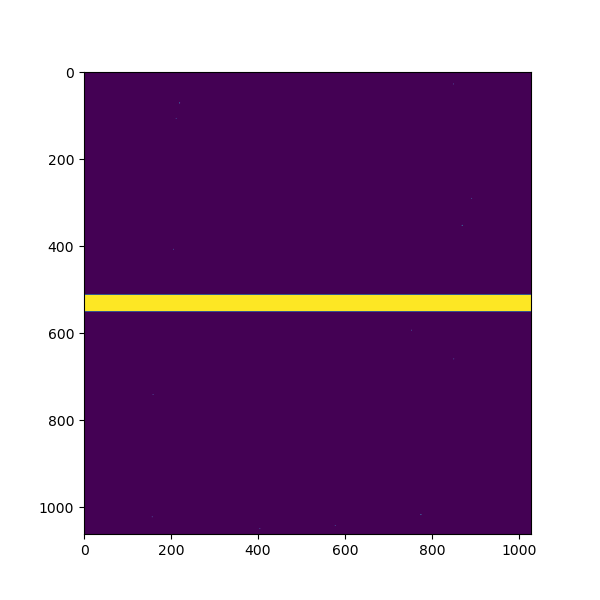

In [3]:
project_dir = '/data/staff/common/data'
experiment_dir = os.path.join(project_dir, 'nm-eiger1m-sat')

stacks = {
    "no_tilt_close": {
        "filename": 'threshold-19.h5',
    },
}

data_layer = 9
saves = {}

for stack_name in stacks.keys():
    fname = os.path.join(experiment_dir, stacks[stack_name]['filename'])
    with h5py.File(fname,'r') as f:
        imgs = f['/entry/measurement/Eiger/data'][()]
    saves[stack_name] = {
        "original_image": imgs[0,:,:],
        "original_images": imgs,        
    }

img = saves["no_tilt_close"]["original_image"]
perc = np.percentile(img, 99.9)
plt.figure(figsize=(6,6))
plt.imshow(img, vmax=perc, vmin=0)
plt.show()

Find the top module.

Let's hope there at least a single nonzero pixel at each line except the gap.

gap index[0]: 512
gap index size: 38
nb of rows: 1062
test: 2*gap_index[0]+gap_index_size == nb_of_rows: True
module size: 512 x 1028
assuming 2 x 4 ASICs
ASIC size: 255.00 x 255.50


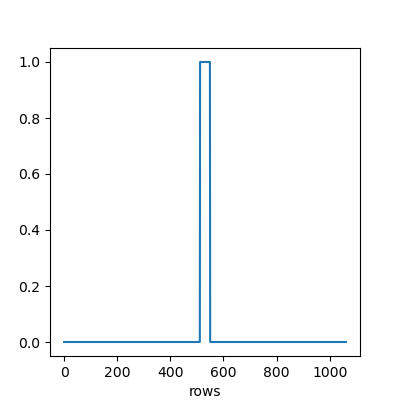

In [4]:
plt.figure(figsize=(4,4))
plt.plot(np.all(img==np.uint32(-1),axis=1))
plt.xlabel('rows')

idx_gap = np.argwhere( np.all(img==np.uint32(-1), axis=1) ).flatten()
print('gap index[0]:', idx_gap[0])
print('gap index size:', len(idx_gap))
print('nb of rows:', img.shape[0])
print('test: 2*gap_index[0]+gap_index_size == nb_of_rows:', (2*idx_gap[0]+len(idx_gap))==img.shape[0])

assert((2*idx_gap[0]+len(idx_gap))==img.shape[0])

a_nrows = 2
a_ncols = 4

print('module size: %d x %d' % (idx_gap[0], img.shape[1],))
print('assuming %d x %d ASICs' % (a_nrows, a_ncols,))
print('ASIC size: %.2f x %.2f' % ((idx_gap[0]-2*(a_nrows-1))/a_nrows, (img.shape[1]-2*(a_ncols-1))/a_ncols,))

count nonzero: 1028


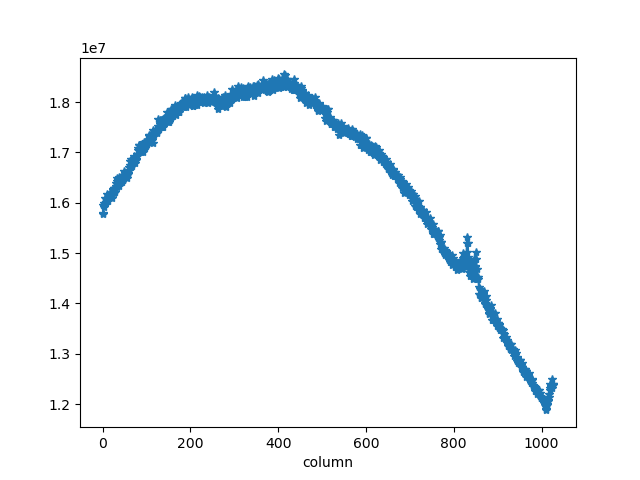

In [5]:
imgs = saves["no_tilt_close"]["original_images"]
_dta = imgs.copy()
mask = np.logical_or(img==np.uint32(-1),img==np.uint32(-2))
_dta[:,mask] = 0
plt.figure()
plt.plot(np.sum(_dta, axis=(0,1)),'*-')
plt.xlabel('column');
print('count nonzero:', np.count_nonzero(np.sum(_dta, axis=(0,1))))

perc-low: 0.61, perc-high: 1.73


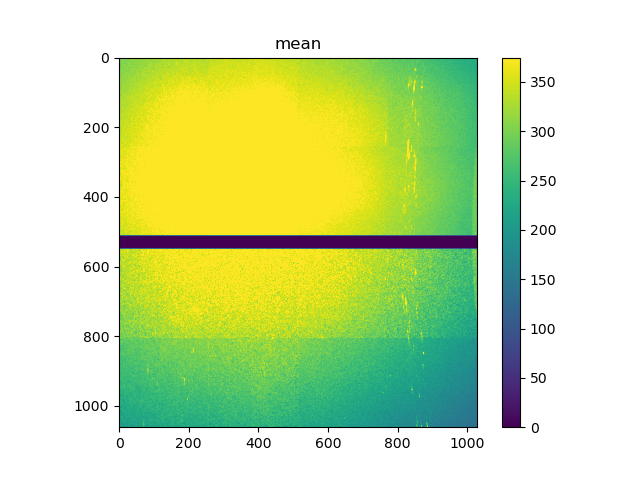

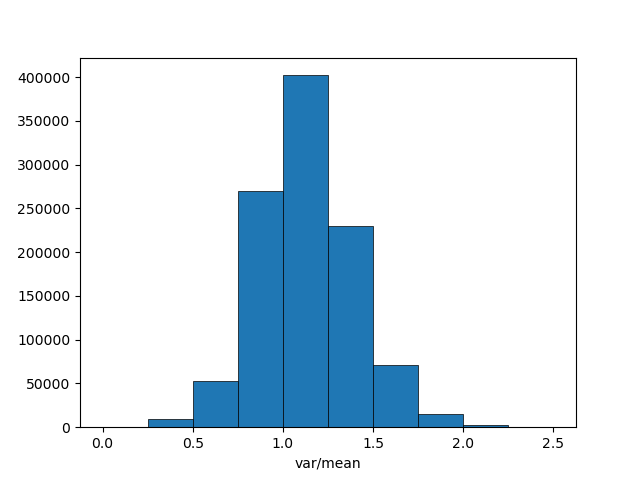

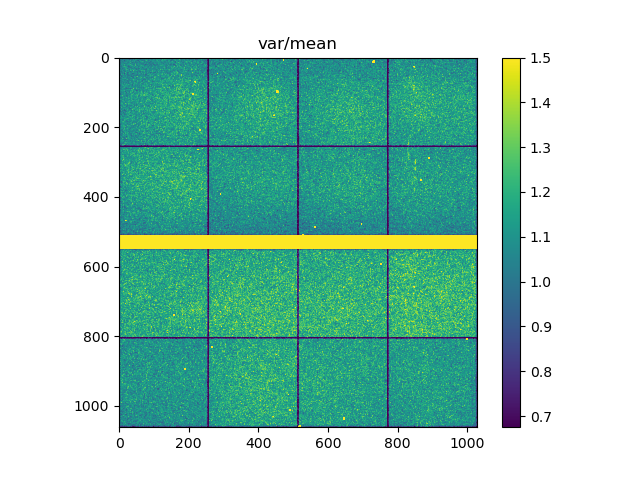

In [6]:
var = np.var(_dta, axis=0)
m = np.mean(_dta, axis=0)
vm = np.percentile(m[~mask], 75)
plt.figure()
plt.imshow(m, vmax=vm)
plt.colorbar()
plt.title('mean')
r = np.empty_like(m)
lidx = m > 0            
r[lidx] = var[lidx]/m[lidx]
print('perc-low: %.2f, perc-high: %.2f' % (np.percentile(r[lidx],2),np.percentile(r[lidx],98),))
plt.figure()
plt.hist(r[lidx].flatten(), range=(0,2.5), edgecolor='black', linewidth=0.5)
plt.xlabel('var/mean')
plt.figure()
plt.imshow(r, vmax=0.75, vmin=1.5)
plt.title('var/mean')
plt.colorbar();

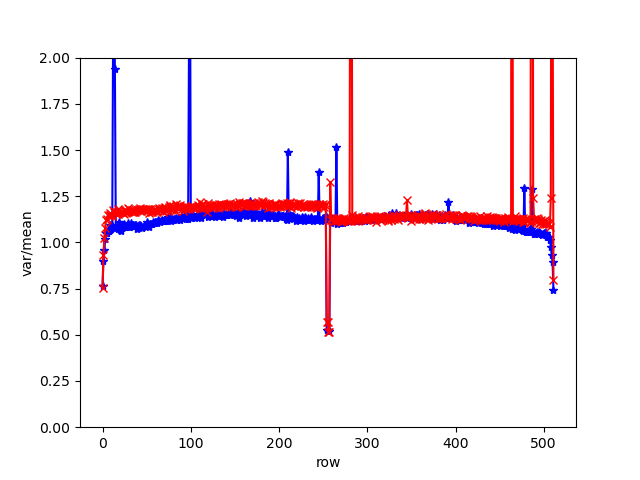

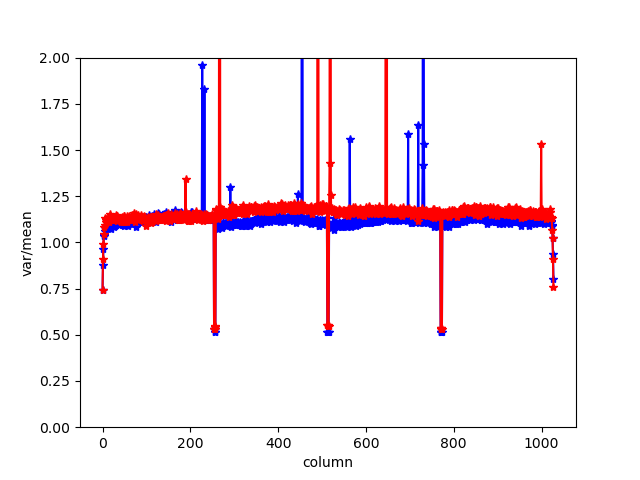

In [7]:
plt.figure()
_r = r.copy()
_r[~lidx] = np.mean(_r[lidx])
plt.plot(np.mean(_r[:idx_gap[0],:],axis=1),'b*-')
plt.plot(np.mean(_r[idx_gap[-1]+1:,:],axis=1),'rx-')
plt.ylim((0,2))
plt.xlabel('row')
plt.ylabel('var/mean')
plt.figure()
plt.plot(np.mean(_r[:idx_gap[0],:],axis=0),'b*-')
plt.plot(np.mean(_r[idx_gap[-1]+1:,:],axis=0),'r*-')
plt.ylim((0,2))
plt.xlabel('column')
plt.ylabel('var/mean');

In [8]:
print( np.argwhere( np.mean(_r[:idx_gap[0],:],axis=0)<0.6 ).flatten() )
print( np.argwhere( np.mean(_r[idx_gap[-1]+1:,:],axis=0)<0.6 ).flatten() )
print( np.argwhere( np.mean(_r[:idx_gap[0],:],axis=1)<0.6 ).flatten() )
print( np.argwhere( np.mean(_r[idx_gap[-1]+1:,:],axis=1)<0.6 ).flatten() )

[254 255 256 257 512 513 514 515 770 771 772 773]
[254 255 256 257 512 513 514 515 770 771 772 773]
[254 255 256 257]
[254 255 256 257]
